# <strong>농산물 유통 가격정보 수집하기
오늘의 메뉴 추천 시스템

<br>
## <STRONG>1 농산물 code 추출하기
https://www.kamis.or.kr

In [1]:
from data.food import get_code
code = get_code()
code.head(5)

,Group,Item,Sort,Cate,Code,Kind,단위,Rank,친환경 등급
0,식량작물,쌀,일반계,100,111,01,kg,"[04, 05]","07,08,09"
1,식량작물,쌀,햇일반계,100,111,05,kg,"[04, 05]",NaN
2,식량작물,찹쌀,일반계,100,112,01,kg,"[04, 05]",NaN
3,식량작물,콩,백태(국산),100,141,01,kg,"[04, 05]",NaN
4,식량작물,콩,콩나물콩,100,141,02,kg,"[04, 05]",NaN


<br>
## **2 농산물 유통정보 API 활용**
https://www.kamis.or.kr/customer/reference/openapi_list.do?action=detail&boardno=6

In [2]:
from data.food import get_check
get_check(code,151)

Web Status :  200
aT API : import data Success


In [3]:
from data.food import get_api
price = get_api(code, 31, '2018-04-12')
price.head(3)

Time : 1 sec, Web Status Code : 200
aT API : import data Success
Item :  채소류 호박 쥬키니


,Item,Sort,Price
Date,,,
2018-04-12,호박,쥬키니,1628
2018-04-13,호박,쥬키니,1628
2018-04-16,호박,쥬키니,1628


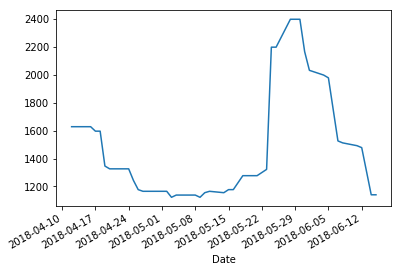

In [4]:
%matplotlib inline
price.Price.plot()

<br>
## **3. Web Page에서 Crawling을 사용한 가격 수집**
카테고리별 수집으로 빠르지만, 복잡한 후처리를 필요 (축산물 (소, 돼지, 닭) 가격정보는 누락)

In [5]:
from data.food import get_web
get_web('채식')

Food Code is not found {'식량': '100', '채소': '200', '특용': '300', '과일': '400', '축산': '500', '수산': '600'}


In [6]:
web_price = get_web('수산', '2018-06-14')
web_price

,품목,종류,구분,일평년,1년전,1개월전,2주일전 (05/31),1주일전 (06/07),당일 (06/14)
0,고등어,생선(1마리),중품,3273,3190,3186,2950,3301,3353
1,고등어,냉동(1마리),중품,2320,2335,2228,2247,2274,2282
2,고등어,염장(2마리),중품,2956,3002,3026,3090,3055,2902
3,고등어,냉동(수입)(1마리),중품,1993,1993,2124,2213,2230,2247
4,꽁치,냉동(수입)(5마리),중품,2934,2934,3256,3434,3414,3298
5,갈치,생선(1마리),중품,10526,10543,8956,6694,7016,6592
6,갈치,냉동(1마리),중품,7688,7688,4730,4655,4700,4730
7,명태,냉동(1마리),중품,2399,2508,2577,2713,2764,2773
8,물오징어,냉동(1마리),중품,2274,3174,3567,3639,3700,3699
9,건멸치,건멸치(100g),중품,2329,2739,2664,2693,2702,2678


<br>
## **4. Web Page 결과를 시계열로 재정리**
DataFrame reshape

In [7]:
from data.food import get_web_series

In [8]:
get_web_series('수산', '2015-01-14')

,Date,품목,종류,구분,Price
0,2018-01-14,고등어,생선(1마리),중품,3762
1,2018-01-14,고등어,냉동(1마리),중품,2239
2,2018-01-14,고등어,염장(2마리),중품,3309
3,2018-01-14,갈치,생선(1마리),중품,9873
4,2018-01-14,명태,냉동(1마리),중품,2143
5,2018-01-14,물오징어,생선(1마리),중품,2598
6,2018-01-14,물오징어,냉동(1마리),중품,2099
7,2018-01-14,건멸치,건멸치(100g),중품,2041
8,2018-01-14,건오징어,건오징어(10마리),중품,23304
9,2018-01-14,김,마른김(10장),중품,783


In [9]:
get_web_series('수산', '2017-06-13')

,Date,품목,종류,구분,Price
0,2018-06-13,고등어,생선(1마리),중품,3228
1,2018-06-13,고등어,냉동(1마리),중품,2326
2,2018-06-13,고등어,염장(2마리),중품,2902
3,2018-06-13,고등어,냉동(수입)(1마리),중품,2087
4,2018-06-13,꽁치,냉동(수입)(5마리),중품,2948
5,2018-06-13,갈치,생선(1마리),중품,10486
6,2018-06-13,갈치,냉동(1마리),중품,7703
7,2018-06-13,명태,냉동(1마리),중품,2508
8,2018-06-13,물오징어,냉동(1마리),중품,3174
9,2018-06-13,건멸치,건멸치(100g),중품,2783


<br>
## **5. 기간별 데이터 DataBase 저장하기**
Sqlite3

In [10]:
start_date = '2018-01-01'
start_date[:4]

'2018'

In [11]:
import pandas as pd
from datetime import date
one_year = pd.date_range('2016-01-01', str(date.today()))
one_year

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2018-06-09', '2018-06-10', '2018-06-11', '2018-06-12',
               '2018-06-13', '2018-06-14', '2018-06-15', '2018-06-16',
               '2018-06-17', '2018-06-18'],
              dtype='datetime64[ns]', length=900, freq='D')

In [12]:
# Business Day 인덱스를 추출
data = [i    for i in range(len(one_year))]
data = pd.Series(data, index=one_year)
data = data.resample('B').max()
date = [str(da) for da in data.index.date]
date[:5]

['2016-01-01', '2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07']

In [13]:
# 카테고리별 데이터 수집 후 CSV로 저장하기
category = ["식량", "채소", "특용", "과일", "축산", "수산"]
category = category[0]

# result, date_info = [], []
# for dat in date:
#     web = get_web_series(category, dat)
    
#     if web.Date[1] not in date_info: 
#         date_info.append(web.Date[1])
#         result.append(web)
#         print(web.Date[1], 'is saved to CSV')

# df = pd.concat(result, axis=0)
# df.to_csv('./csv/'+category+'-2018.csv', encoding='ms949', index=None)

<br>
## **5. 기간별 데이터 DataBase 저장하기**
Sqlite3

In [14]:
get_web_series('식량', '2017-06-13')

,Date,품목,종류,구분,Price
0,2018-06-13,쌀,일반계(20kg),상품,33871
1,2018-06-13,찹쌀,일반계(1kg),상품,3765
2,2018-06-13,콩,백태(국산)(500g),상품,4544
3,2018-06-13,콩,백태(국산)(500g),중품,3059
4,2018-06-13,팥,적두(국산)(500g),상품,8671
5,2018-06-13,팥,적두(국산)(500g),중품,6720
6,2018-06-13,녹두,국산(500g),상품,6537
7,2018-06-13,녹두,국산(500g),중품,5424
8,2018-06-13,고구마,밤(1kg),상품,4792
9,2018-06-13,고구마,밤(1kg),중품,3526


In [14]:
import pandas as pd
df = pd.read_csv('./Foods/csv/식량-2015csv', encoding='ms949')
print(set(df.품목))
set(df[(df.품목 == '감자') & (df.구분 == "중품")].종류)

{'쌀', '고구마', '찹쌀', '감자', '팥', '녹두', '콩'}


{'대지마(100g)', '수미(100g)'}

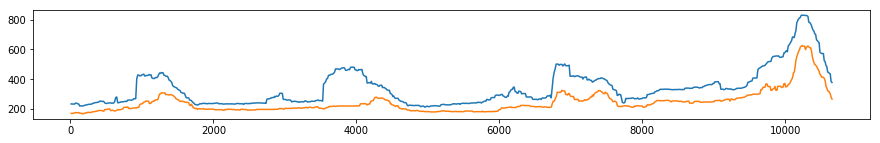

In [15]:
# 감자정보
df[(df.종류=="수미(100g)") & (df.구분 == "상품")].Price.plot(figsize=(15,2))
df[(df.종류=="수미(100g)") & (df.구분 == "중품")].Price.plot(figsize=(15,2))

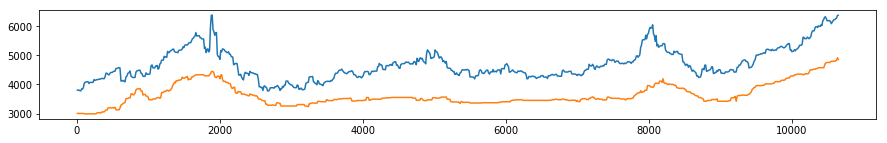

In [16]:
# 고구마정보
df[(df.품목=="고구마") & (df.구분 == "상품")].Price.plot(figsize=(15,2))
df[(df.품목=="고구마") & (df.구분 == "중품")].Price.plot(figsize=(15,2))

{'국산(500g)'}


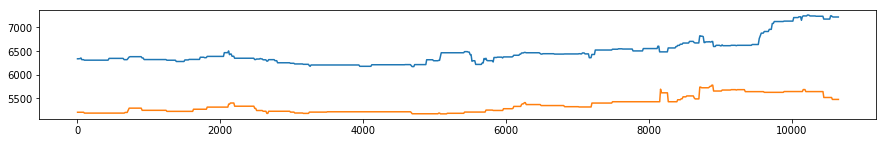

In [17]:
# 녹두
print(set(df[(df.품목 == '녹두')].종류))
df[(df.품목=="녹두") & (df.구분 == "상품")].Price.plot(figsize=(15,2))
df[(df.품목=="녹두") & (df.구분 == "중품")].Price.plot(figsize=(15,2))